In [5]:
from grad_analysis import GradAnalysis
import numpy as onp
import jax.numpy as np
from pathlib import Path

figpath = Path.cwd().parent.parent / "figures/polynomial_grad"
figpath.mkdir(parents=True, exist_ok=True)


def simple_poly(x: float) -> float:
    return 4 - 3 * x + 2 * x**2

In [12]:
onp.random.seed(2023)
n_points = 100
x = onp.random.randn(n_points)
y = simple_poly(x) + onp.random.randn(n_points)

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
true_theta = np.array([4, -3, 2]).reshape(-1, 1)
n_epochs = 100

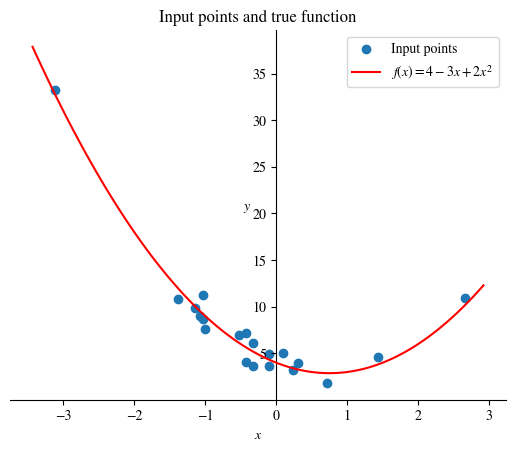

In [14]:
from plotutils import setup_axis
import matplotlib.pyplot as plt

xlim = (np.min(x) * 1.1, np.max(x) * 1.1)
ylim = (np.min(y) * 0.9, np.max(y) * 1.1)
ax = setup_axis(xlim, ylim)

ax.scatter(x, y, label="Input points")
xnew = np.linspace(xlim[0], xlim[1], 100)
ynew = simple_poly(xnew)
ax.plot(xnew, ynew, "r", label=r"$f(x) = 4 - 3x + 2x^2$")
ax.legend()
ax.axis("auto")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$", rotation=0)

plt.title("Input points and true function")
plt.savefig(figpath / "input_points.pdf", bbox_inches="tight")
plt.show()

In [15]:
from CostFuncs import fast_OLS

OLS_autodiff_path = figpath / "OLS_autodiff"
OLS_autodiff_path.mkdir(parents=True, exist_ok=True)

GA = GradAnalysis(
    x,
    y,
    n_epochs=n_epochs,
    seed=2023,
    cost_func=fast_OLS,
    true_theta=true_theta,
    target_func=simple_poly,
    showPlots=True,
    savePlots=True,
    figspath=OLS_autodiff_path,
)
GA.gd_main()
GA.minibatch_analysis()

ValueError: Incompatible shapes for broadcasting: (100,) and requested shape (20,)

In [ ]:
from CostFuncs import fast_OLS, fast_OLS_grad

OLS_analytic_path = figpath / "OLS_analytic"
OLS_analytic_path.mkdir(parents=True, exist_ok=True)

GA = GradAnalysis(
    x,
    y,
    n_epochs=n_epochs,
    seed=2023,
    cost_func=fast_OLS,
    derivative_func=fast_OLS_grad,
    true_theta=true_theta,
    target_func=simple_poly,
    showPlots=True,
    savePlots=True,
    figspath=OLS_analytic_path,
)
GA.gd_main()
GA.minibatch_analysis()

In [ ]:
from CostFuncs import fast_ridge

ridge_autodiff_path = figpath / "ridge_autodiff"
ridge_autodiff_path.mkdir(parents=True, exist_ok=True)

GA = GradAnalysis(
    x,
    y,
    n_epochs=n_epochs,
    seed=2023,
    cost_func=fast_ridge,
    true_theta=true_theta,
    target_func=simple_poly,
    lmbda=0.1,
    showPlots=True,
    savePlots=True,
    figspath=ridge_autodiff_path,
)
GA.gd_main()
eta_arr = np.logspace(-3, -1, 20)
lmbda_arr = np.logspace(-4, 0, 20)
GA.ridge_analysis(eta_arr, lmbda_arr)